# Buisness Case: Predicting the price range of the mobile phones considering the  different features given in the data

In [18]:
# Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [19]:
# Load the dataset
data=pd.read_csv('datasets_11167_15520_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Domain Analysis
###### 0) battery_power :
The capacity of a battery is measured in milliampere-hours (or mAh), which indicates how much energy the battery can deliver over time. The common size ranges from 2,000 mAh up to 10,000 mAh or even more than that. A bigger number indicates more power.

###### 1) blue:
* Bluetooth is a wireless protocol that uses radio frequency for exchanging data over short distances. It specifies whether the cell phone has Bluetooth or not.

###### 2) clock_speed:
* The clock speed determines the speed at which the microprocessor executes instructions. A processor with a 1-Gigahertz (GHz) clock speed can process 1 billion instructions per second. The expensive phones have higher clock speeds which make it work faster.

###### 3) dual_sim:
* This specifies whether a device is capable of supporting two SIM cards. The two major types of dual-SIM phones are active and standby.

###### 4) fc:
* It specifies the front camera megapixels.

###### 5) four_g:
* 4G is the fourth generation of mobile phone technology, following 2G and 3G.4G makes it easier to access the internet on mobile.It specifies whether the cell phone has 4G or not.

###### 6) int_memory:
* Internal memory in Gigabytes is the space you get by default on a phone for the storage of media and files.

###### 7) m_dep:
* Mobile depth in cm.

###### 8) mobile_wt:
* Weight of mobile phone.

###### 9) n_cores:
* A processor,also known as CPU, consists of multiple cores: Dual, Quad, Hexa, and Octa core. Processor cores distribute the work that comes in when you use your phone.It specifices the number of cores of processor.

###### 10) pc:
* Primary camera is the main camera refers to the rear-facing camera system.It specifies about the primary camera megapixels

###### 11) px_height:
* Pixel resolution refers to the number of pixels on a display or in a camera sensor specifically in a digital image.It specifies the pixel resolution height.

###### 12) px_width:
* It specifies the pixel resolution width.

###### 13) ram:
* RAM(Random Access Memory) is the part of the phone that is used to store the operating system (OS) and where apps and data currently in use are kept.It specifies the RAM in Megabytes.

###### 14) sc_h:
* It specifies the screen height of mobile in cm.

###### 15) sc_w:
* It specifies the screen width of mobile in cm.

###### 16) talk_time:
* Talk time is the longest time that a single battery charge will last when you are constantly talking on the phone.

###### 17) three_g:
* 3G is the third generation of wireless mobile telecommunications technology.It specifies whether the cell phone has 3G or not.

###### 18) touch_screen:
* A touch screen is a cellphone display screen that also acts as an input device.It specifies whether the cell phone has touch screen or not.

###### 19) wifi:
* Wi-Fi is a WLAN (Wireless Local Area Network) technology. It provides short-range wireless high-speed data connections between mobile data devices (such as laptops,phones) and nearby Wi-Fi access points. It specifies whether the cell phone has wifi or not.

###### 20) price_range:
* This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).'''



## Basic Checks

In [20]:
# To get first 5 rows
data.head() 

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
# To get last five rows
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [22]:
# To check number of rows and columns
data.shape

(2000, 21)

In [23]:
#To display all columns from the dataset
data.head(pd.set_option('display.max_columns',None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [24]:
# To check data types and null values in all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [25]:
# To fetch statistical data from the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [26]:
# To get the total null values in each column
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

## Exploratory data analysis

### Univariate analysis

In [27]:
# To check the column names
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [28]:
# Creating a new dataframe with only continuous variables
data1=data[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [29]:
data1

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,336,670,869,18,10,19


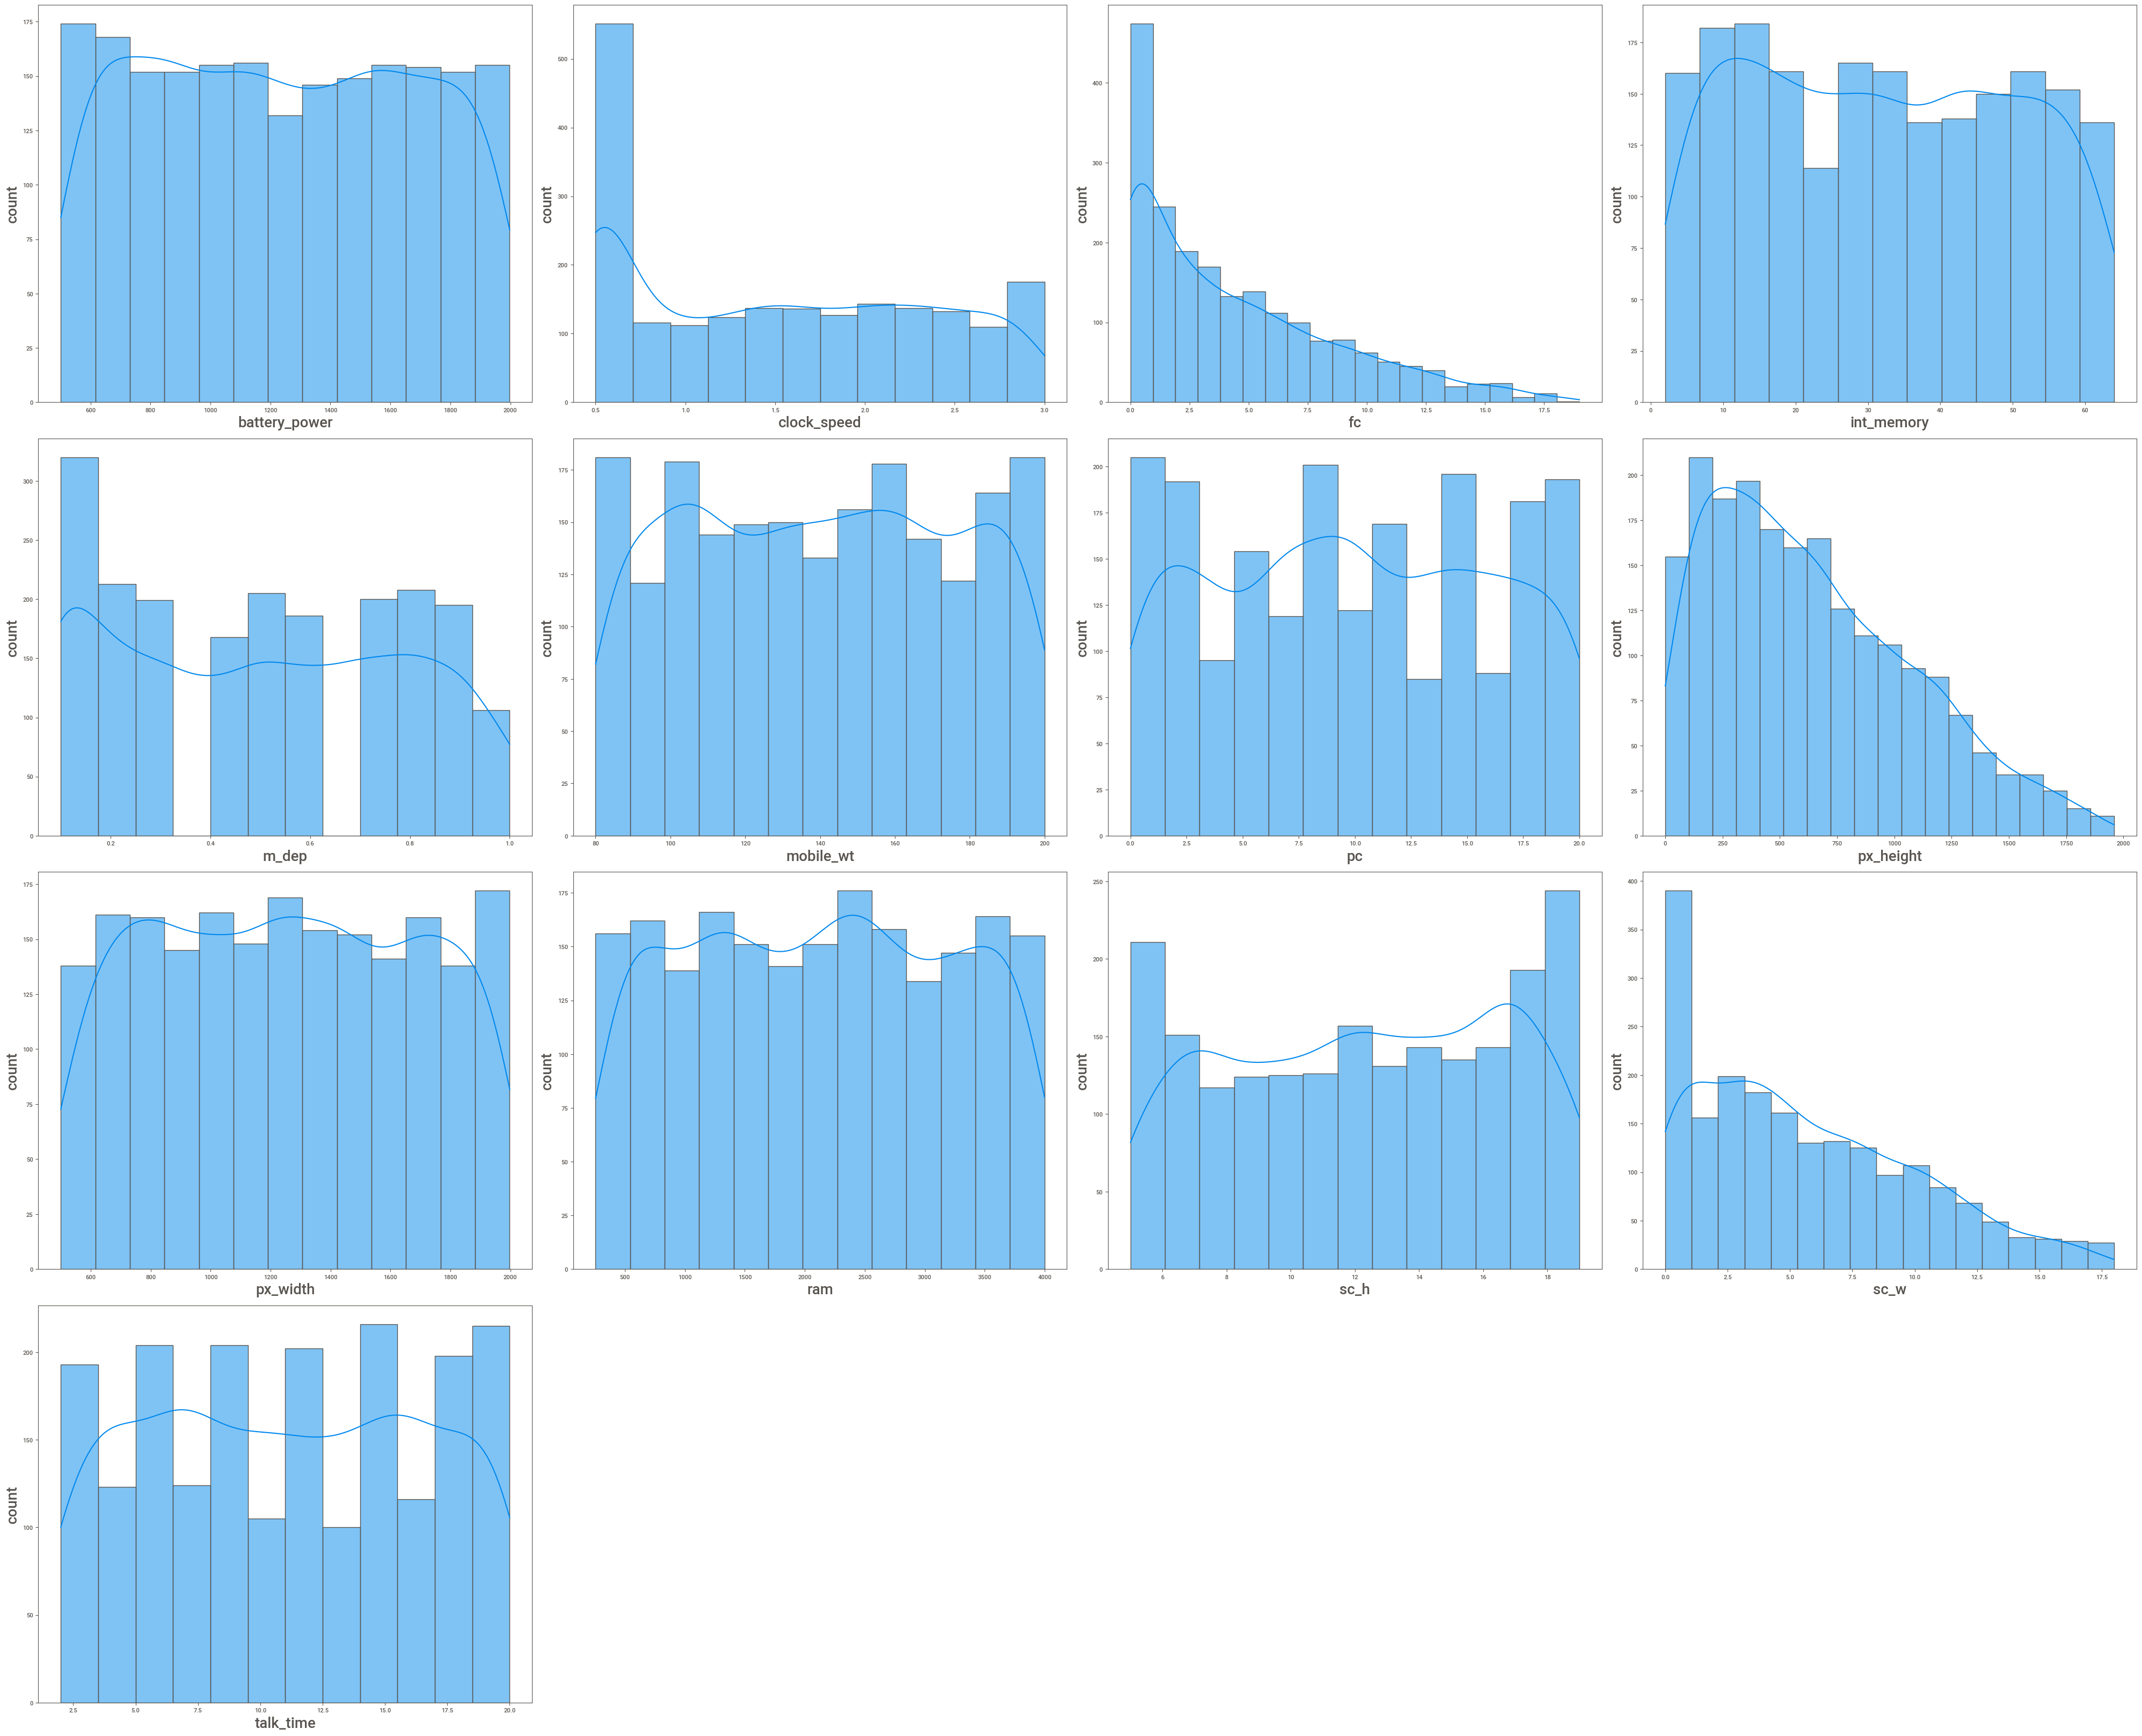

In [30]:
#Plotting each  continuous feature against count variable to check the relation

plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.histplot(x=data1[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Insights
# Insights for battery power

* The battery power between 500 to 620 mAh has more counts compared to others.
* The counts is less for the battery power between 1200 to 1300 (approx).
* The highest count of the battery power is 173(approx).
* The lowest count of the battery power is 130(approx).

# Insights for clock speed

* The clock speed between 0.5 to 0.65 has more counts.
* The count of the clock speed is less between
* The highest count of clock speed is 560(approx).
* The lowest count of the clock speed is 2.6 to 2.8(approx).

# Insights for fc

* fc has more counts between 0 to 1.
* fc has least counts between 16.2-17.3(approx).
* The highest count of fc is 500(approx).
* The lowest value of fc is 9(approx).
* Approximately more the value of fc there is decrease in the number of counts.
Insights for internal memory

* The internal memory between 11.8 to 16 has more counts compared to others.
* The internal memory between 21.7 to 26 has least counts compared to others.
* Insights for mobile dept

The more count is between 0.1 to 0.18
It has least count between 0.95 to 1.0
Insights for mobile weight

There are 4 mobile weights which has almost same counts which is the highest they are between 80 to 90, 99 to 140, 156 to 162 and 190 to 200.
There are 2 mobile weights which has almost same counts which is the least they are between 90 to 99, 172 to 182.
Insights for Primary camera mega pixels

It has the highest count at 0 to 2.
It has the lowest count at 12.4 to 13.8
Insights for pixel height

The highest count is between 100 to 200.
And least count is between 1900 to 1990.
Insights for pixel width

The pixel width between 1900 to 2000 has more counts.
Insights for ram

Between 2300 to 2550 ram has more counts.
It has least counts between 2800 to 3150.
Insights for screen height

The screen height between 18 to 19 has more counts.
The screen height between 7.2 to 8.2
Insights for screen width

The count for screen width is more between 0.0 to 1.5
The count for screen width is less between 17.2 to 18.0
Insights for talk time

More count is between 14 to 15.5 for talk time.
Least count is between 12.5 to 14 for talk time.

In [31]:
# creating a newdataframe with only discrete variables
data2=data[['blue','dual_sim', 'four_g','three_g','touch_screen','wifi']]
data2

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


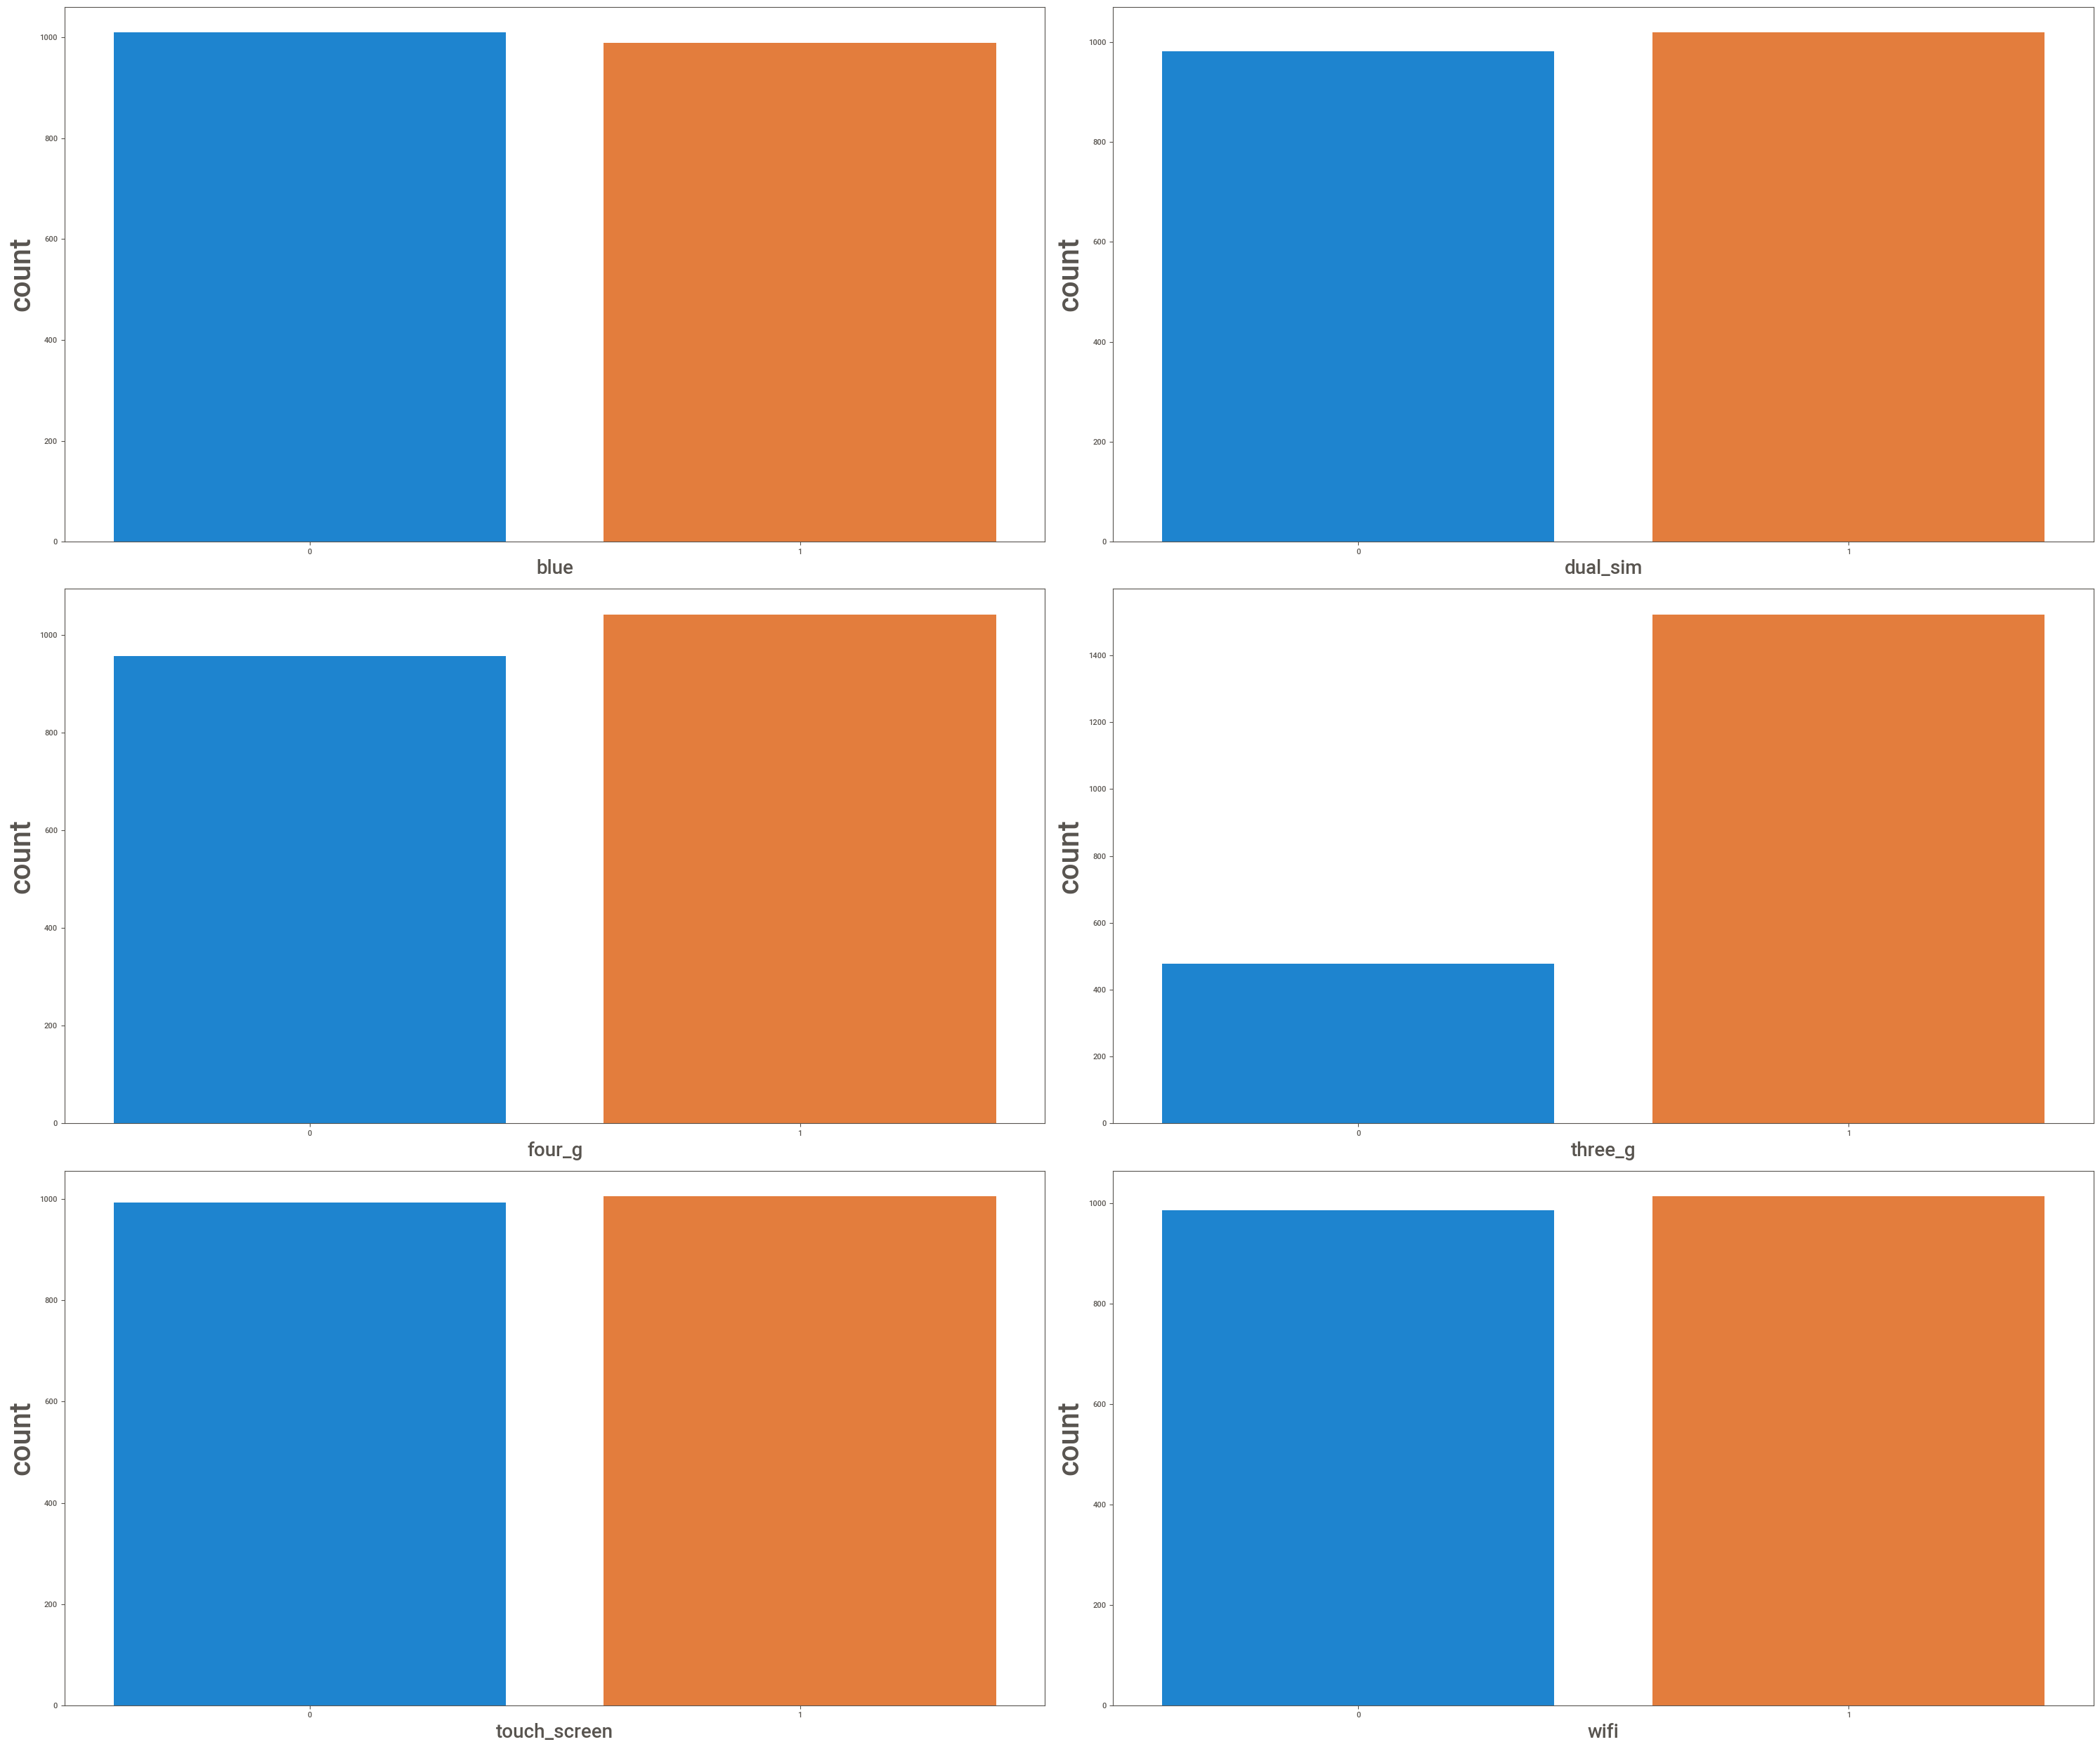

In [32]:
# Plotting each discrete variable against count variable 
plt.figure(figsize=(30,25),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(x=data2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

# Insights
*  The count of mobile phones which doesnot have bluetooth is more than half and the ones with bluetooth is nearly half.
*  Phones which have  a feature of dual sim tend to get sold more than the one without this feature
*  The number of mobiles which support 4G connection are more than 1050 and the ones which doesnot support 4G are near to 950,
   we can observe the difference of around 100 phones
*  phones which supports 3G connection are around 1500 and the phones which doesnot are around 500, which is only
   25% of the total phones
*  count of the Phones with the feature of touch screen are little higher than the ones which doesnot have.
*  The phones which have wifi connectivity tend to have little higher demand than the ones without the  wifi connectivity.

## Bivariate analysis

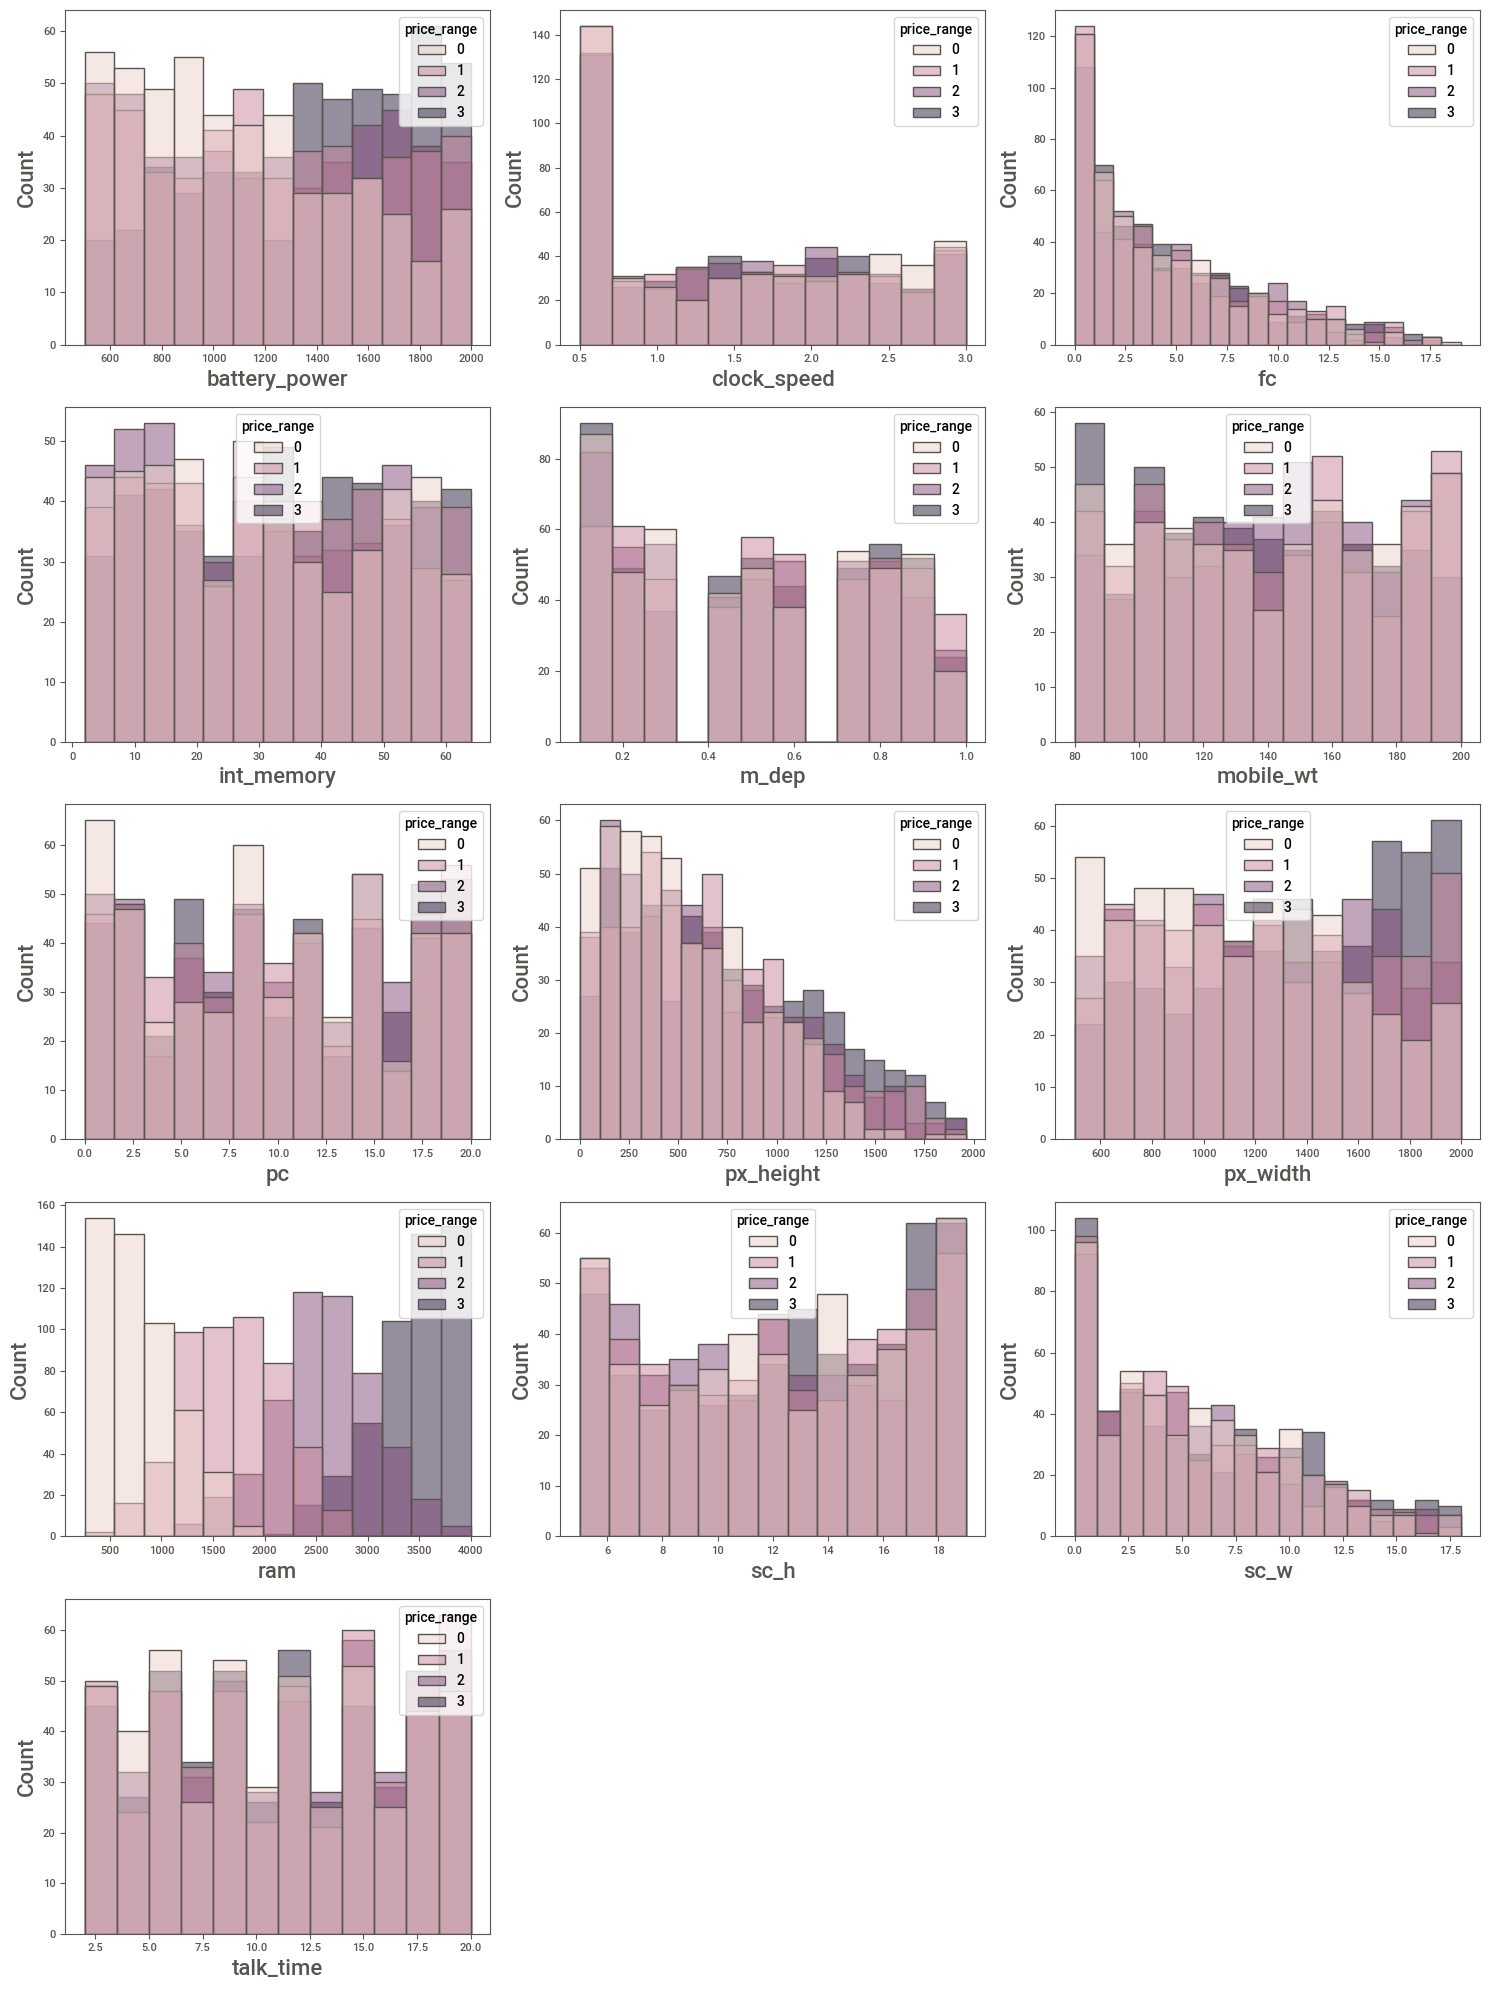

In [33]:
#Plotting to analyse the relation between every numerical feature with the "target" variable
plt.figure(figsize=(15,20)) #to set the canvas size
plotnumber=1 #counter

for i in data1: #for loop to access the columns from data1 
    plt.subplot(5,3,plotnumber) #plotting 13 graphs in canvas(5 rows and 3 columns)
    sns.histplot(data=data,x=i,hue='price_range') #plotting histplot
    plt.xlabel(i,fontsize=16) #assigning name to x-axis and increasing it's font
    plt.ylabel('Count',fontsize=16) #assigning name to y-axis and increasing it's font
    plotnumber=plotnumber+1 #counter increment
plt.tight_layout()

# Insights
* The phones which have battery capacity ranging from 1300 mAh to 2000 mAh have the highest price range
* Phones with clock speed between 1.3 to 2.3 have very high cost ,price is high for almost all the clock speeds
* Phones with maximum RAM have the highest price range
    

In [ ]:
plt.figure(figsize=(15,20)) #to set the canvas size
plotnumber=1 #counter

for i in data2: #for loop to access the columns from data1 
    plt.subplot(5,3,plotnumber) #plotting 13 graphs in canvas(5 rows and 3 columns)
    sns.countplot(data=data,x=i,hue='price_range') #plotting histplot
    plt.xlabel(i,fontsize=16) #assigning name to x-axis and increasing it's font
    plt.ylabel('Count',fontsize=16) #assigning name to y-axis and increasing it's font
    plotnumber=plotnumber+1 #counter increment
plt.tight_layout()

## Insights
''' 
1)Insights for bluetooth:
The cell phone which doesn't have bluetooth has approximately same count for the price range 0,1 and 2 and least for the price range 3.
The cell phone which has bluetooth contains the highest count of price range 3 and the count of other price range 0,1 and 2 has approximately same count.

2)Insights for dual sim:
The dual sim case is similar to bluetooth.
The cell phone which have dual sim has more counts for price range 3.
Likewise the cell phone which doesn't have dual sim has more count for both price range 0 and 2.
The cell phone which doesn't contain dual sim has the least count for the price range 3.

3)Insights for four g:
The cell phone which doesn't have four g has more counts for price range 2.
And which doesn't have four g has the least count for the price range 3.
The cell phone which has four g has the highest count for the price range 3,lowest for the price range 2 and approximately same count for the price range 0 and 1.

4)Insights for n cores:
The n_core 1 has more count for the price range 1 and has less count for the price range 0.
And n_core 2 has more count for 0 and less count for price range 2.
And n_core 3 has more count for the price range 1 and less count for price range 2.
Followed by n_core 4 has more count for the price range 1 and less count for price range 3.
Next n_core 5 has more count for the price range 3 and less count for the price range 1.
n_core 6 has more count for the price range 0 and less count for 1.
n_core 7 has more counts for both the price range 2 and 3 and less count for price range 1.
Finally n_core 8 has more count for the price range 2 and less count for price range 3.

5)Insights for three g:
The cell phone in which it does not contain three g the price range 0 has more counts.
And in which it contains three g the price range 2(approx.) has more counts.
We can see a drastic change in the presence of the three g feature the count is highest and it is approximately same for all of the price range and in the absence of this feature the count of the price range(0,1,2 and 3) is less.

6)Insights for touch screen:
The touch screen cell phones has more counts for the price range (almost for both) 0 and 1 and less count for the price range 2.
The cell phones which doesn't have touch screen has more count for the price range 2 and less count for both the price range 0 and 1.

7)Insights for wifi:
The cell phone which doesn't have wifi has more counts for price range 0 and less for price range 3.
And for the price range 3 the count is more in which the wifi is present and less for the price range 0.
By plotting this countplot we can conclude that if a cell phone contains these features like bluetooth,dual sim,four g,three g and wifi it has the highest count for price range 3.
[ ]'''


# Multivariate analysis

In [ ]:
sns.pairplot(data)

In [ ]:
import sweetviz as sv#importing sweetviz library
my_report = sv.analyze(data)#syntax to use sweetviz
my_report.show_html()#Default arguments will generate to "SWEETVIZ_REPORT.html

# Data Preprocessing

In [ ]:
# Check the null values
data.isnull().sum()

In [35]:
# Check for duplicates
data.duplicated().sum()

0

In [36]:
data.price_range.value_counts() # Data is balanced

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

* There is no categorical data in the given data set to convert into numerical

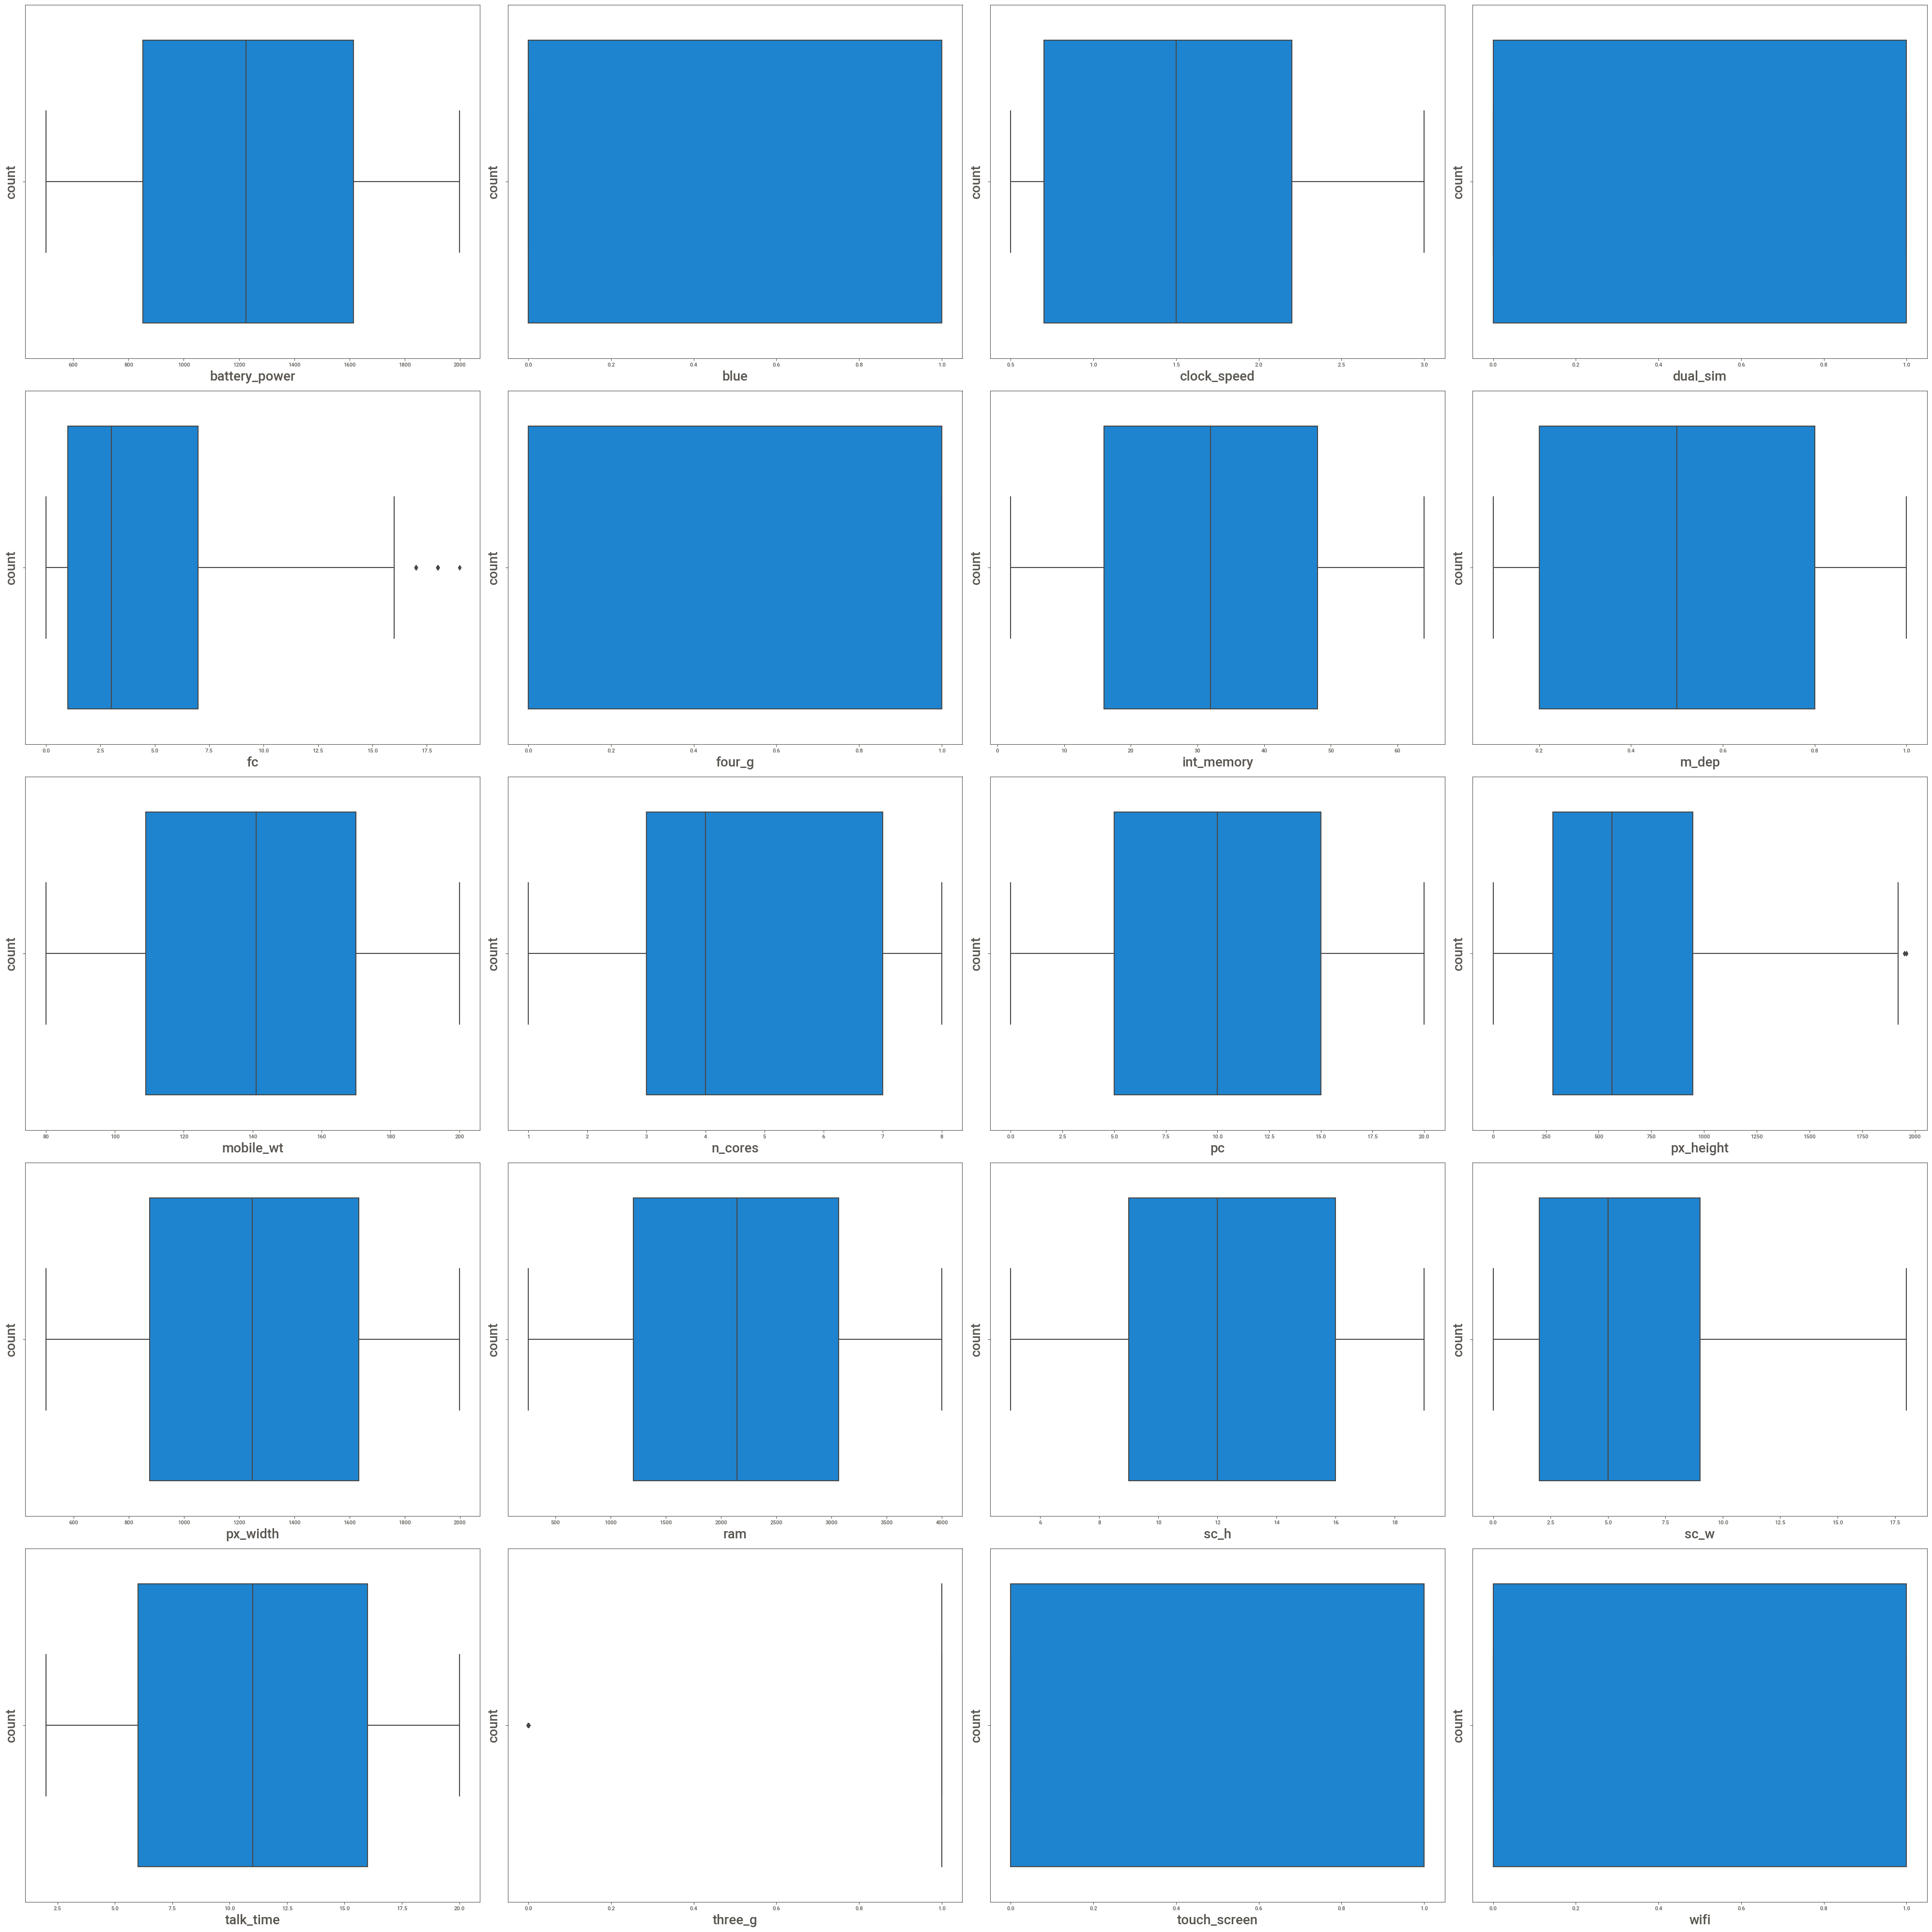

In [37]:
#check for outliers
plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=20:
        plt.subplot(5,4,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='fc'>

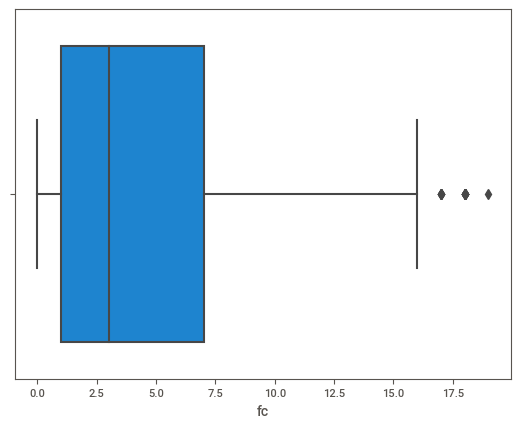

In [38]:
sns.boxplot(x='fc',data=data)

In [39]:
# Replacing the outliers with median
data.loc[data.fc>16,"fc"]=np.median(data.fc)

In [40]:
data.loc[data['fc']>16]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


<AxesSubplot:xlabel='fc'>

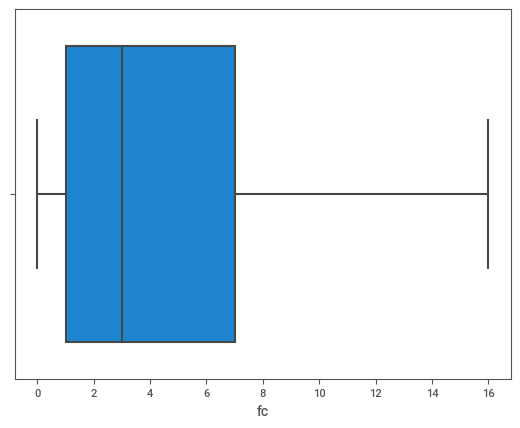

In [41]:
sns.boxplot(x='fc',data=data)

### Insights
* In px_height outlier is not considered as it is very near to the data points

# Feature Engineering

In [42]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,0.624363,-0.030611,-0.014033,0.019830,0.000701,-0.002200,-0.008712,-0.003838,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [43]:
data1.corr()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720
ram,-0.000653,0.003443,0.015099,0.032813,-0.009434,-0.002581,0.028984,-0.020352,0.004105,1.000000,0.015996,0.035576,0.010820


In [44]:
data2.corr()

,blue,dual_sim,four_g,three_g,touch_screen,wifi
blue,1.000000,0.035198,0.013443,-0.030236,0.010061,-0.021863
dual_sim,0.035198,1.000000,0.003187,-0.014008,-0.017117,0.022740
four_g,0.013443,0.003187,1.000000,0.584246,0.016758,-0.017620
three_g,-0.030236,-0.014008,0.584246,1.000000,0.013917,0.004316
touch_screen,0.010061,-0.017117,0.016758,0.013917,1.000000,0.011917
wifi,-0.021863,0.022740,-0.017620,0.004316,0.011917,1.000000


In [45]:
data3=data[['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','pc','px_height',
'px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi']]
# excluding the price range column

In [46]:
data3.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,0.624363,-0.030611,-0.014033,0.019830,0.000701,-0.002200,-0.008712,-0.003838,-0.025563,0.010491
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964


<AxesSubplot:>

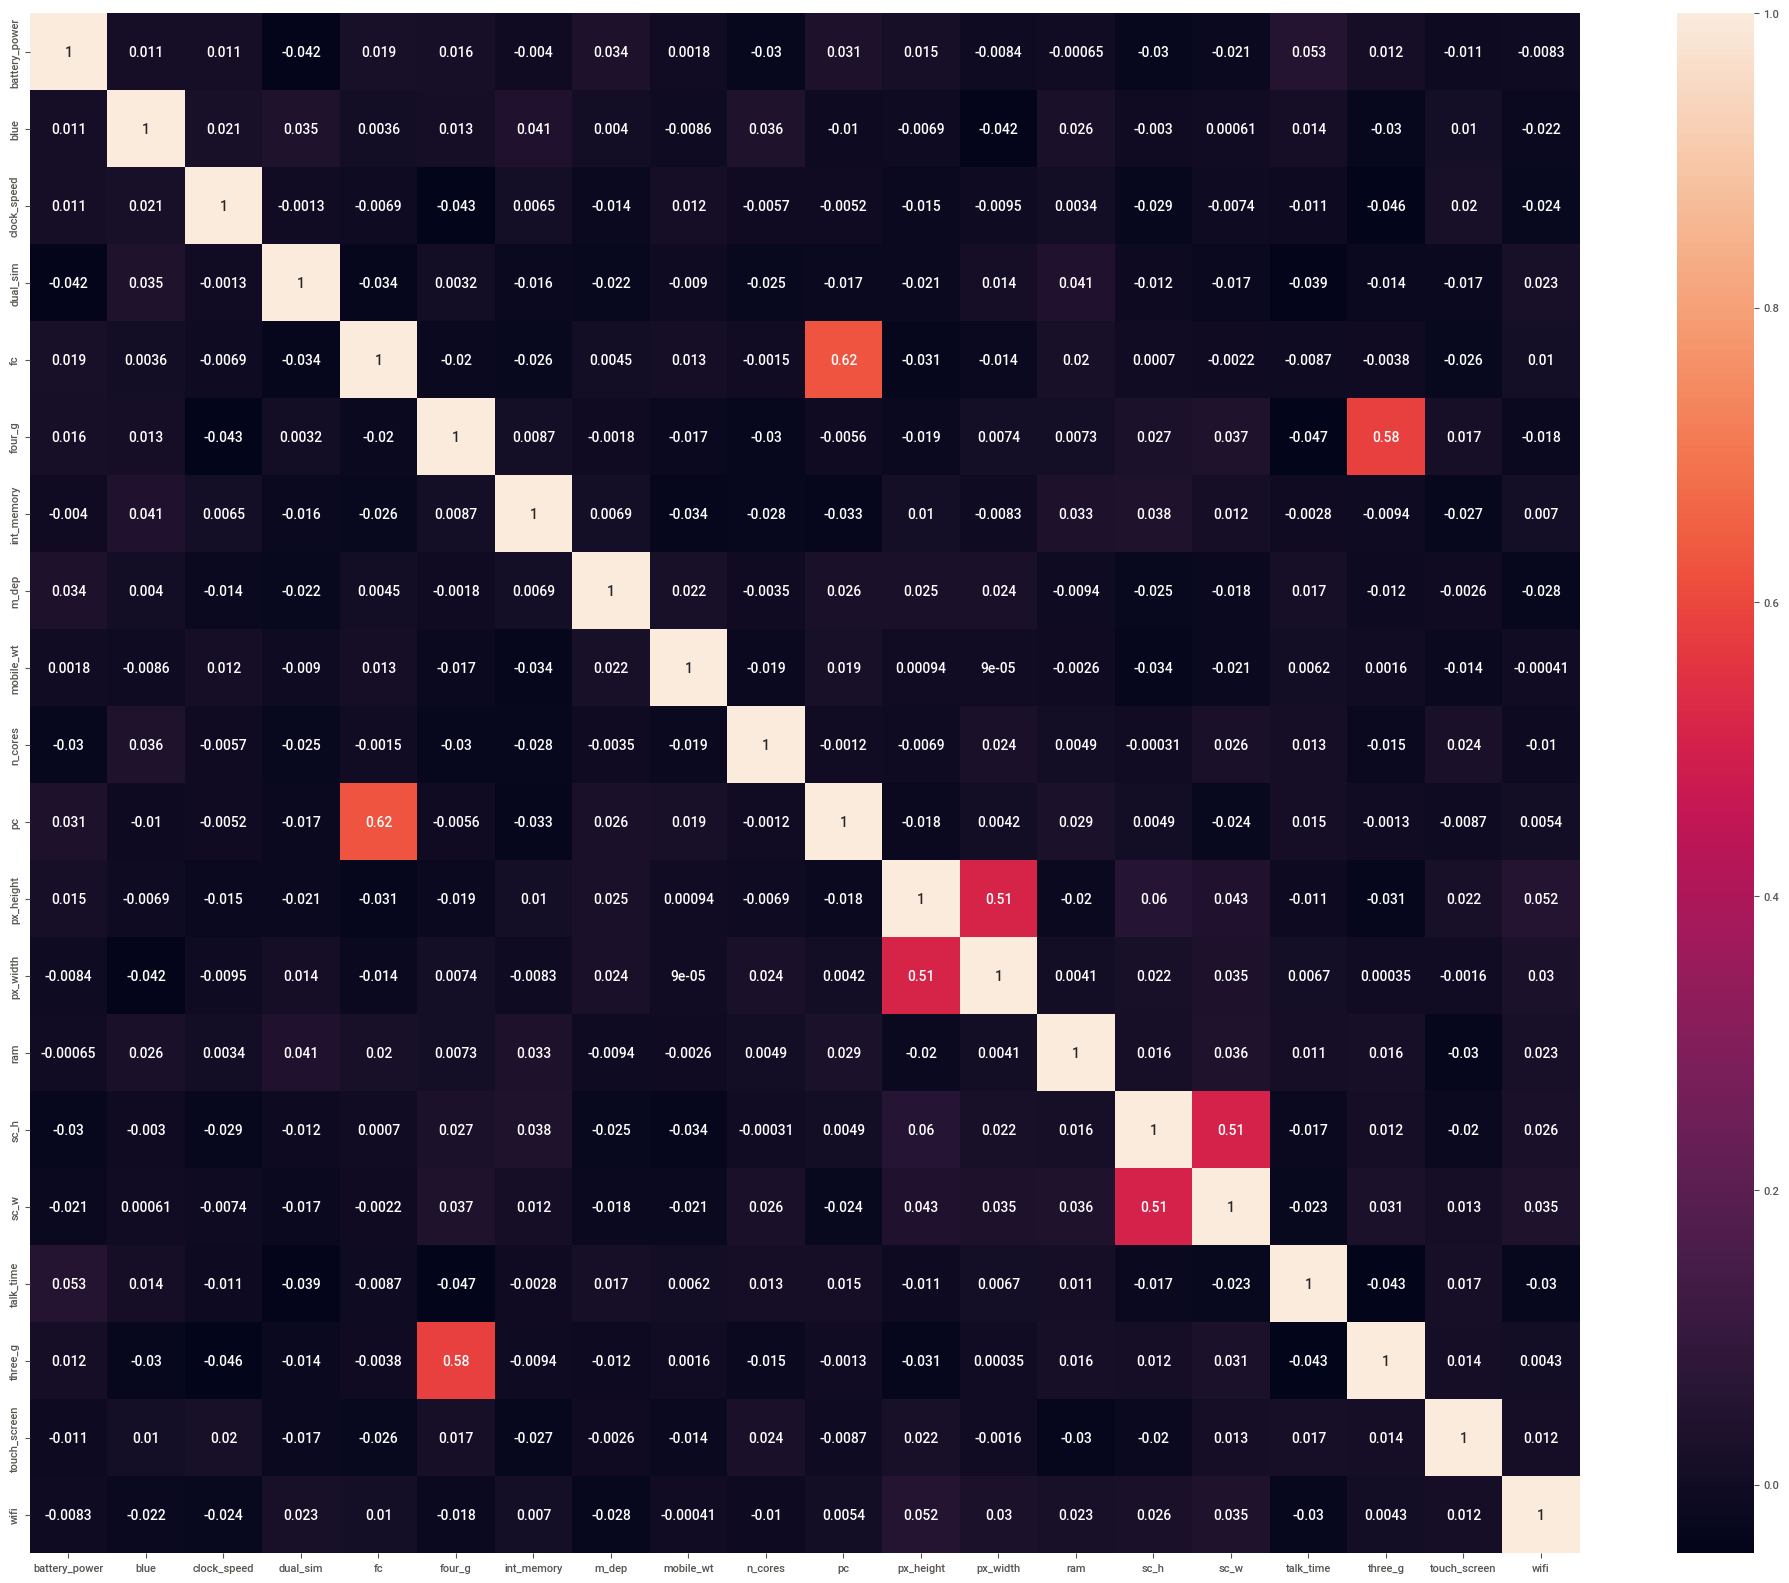

In [47]:
# To check the correlation
plt.figure(figsize=(25,20))
sns.heatmap(data3.corr(),annot=True)

## Insights
* There is no or less correlation between any column

# Model Building

### 1) Logistic Regression

### Model Creation

In [48]:
# Creating independent variables
x=data.drop('price_range',axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [49]:
# Creating dependent variables
y=data.price_range
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.22778891, 0.        , 0.68      , ..., 0.        , 0.        ,
        1.        ],
       [0.34736139, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.04141617, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.94188377, 0.        , 0.16      , ..., 1.        , 1.        ,
        0.        ],
       [0.6753507 , 0.        , 0.16      , ..., 1.        , 1.        ,
        1.        ],
       [0.00601202, 1.        , 0.6       , ..., 1.        , 1.        ,
        1.        ]])

In [51]:
# To convert  array in to Dataframe
x=pd.DataFrame(x_scaled,columns=x.columns)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.0000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.0000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.0625,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.2500,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=33)

In [53]:
x_train

array([[0.99732799, 1.        , 0.12      , ..., 1.        , 1.        ,
        0.        ],
       [0.41950568, 1.        , 0.12      , ..., 1.        , 1.        ,
        0.        ],
       [0.37875752, 0.        , 0.6       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.95991984, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.35738143, 1.        , 0.76      , ..., 0.        , 1.        ,
        0.        ],
       [0.47895792, 1.        , 0.92      , ..., 0.        , 0.        ,
        0.        ]])

In [54]:
x_test

array([[0.91583166, 1.        , 0.16      , ..., 0.        , 0.        ,
        1.        ],
       [0.38810955, 0.        , 0.12      , ..., 0.        , 1.        ,
        1.        ],
       [0.32932532, 0.        , 0.28      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.84101536, 0.        , 0.36      , ..., 0.        , 1.        ,
        0.        ],
       [0.70140281, 0.        , 0.24      , ..., 0.        , 1.        ,
        0.        ],
       [0.63259853, 0.        , 0.36      , ..., 0.        , 1.        ,
        0.        ]])

In [55]:
y_train

1240    0
1608    1
719     1
739     2
1662    1
       ..
658     3
578     0
1752    3
391     1
1044    1
Name: price_range, Length: 1400, dtype: int64

In [56]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(multi_class='ovr')
LR.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [57]:
y_pred=LR.predict(x_test)
y_pred

array([3, 2, 2, 1, 2, 1, 3, 3, 0, 2, 0, 0, 2, 0, 0, 0, 2, 3, 3, 2, 1, 1,
       1, 0, 0, 1, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 2, 0, 3, 0, 3, 2, 0, 3,
       0, 2, 3, 1, 0, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 0,
       0, 3, 2, 3, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 3, 1, 2, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 0, 2, 1, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 2, 3, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2,
       3, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 3, 3, 3, 0, 0, 1, 3, 0,
       0, 3, 0, 3, 1, 0, 1, 2, 2, 1, 3, 3, 0, 3, 0, 0, 1, 3, 3, 3, 0, 2,
       0, 2, 3, 1, 2, 3, 1, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2, 0, 3, 0, 1, 1,
       1, 1, 0, 3, 1, 3, 0, 2, 0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       2, 1, 2, 2, 0, 3, 3, 0, 0, 2, 3, 3, 1, 0, 3, 1, 0, 2, 2, 3, 3, 3,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 1,
       0, 0, 3, 0, 3, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 0, 0, 0, 3, 2, 2, 1,
       0, 2, 2, 3, 0, 3, 3, 1, 0, 2, 0, 3, 2, 1, 1,

In [58]:
y_test.values

array([2, 2, 2, 1, 2, 1, 3, 3, 0, 1, 0, 0, 1, 0, 0, 0, 2, 3, 3, 2, 1, 1,
       2, 0, 0, 1, 2, 1, 3, 3, 3, 1, 3, 1, 0, 1, 2, 0, 2, 0, 3, 2, 0, 3,
       0, 2, 2, 1, 1, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 0,
       0, 3, 1, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 3, 1,
       1, 0, 1, 0, 0, 2, 2, 3, 0, 3, 3, 3, 0, 2, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2,
       3, 2, 2, 2, 0, 1, 1, 2, 3, 3, 1, 3, 1, 0, 3, 3, 2, 0, 0, 1, 3, 0,
       0, 3, 0, 3, 1, 1, 1, 2, 2, 1, 3, 3, 1, 3, 0, 0, 1, 3, 3, 3, 0, 2,
       1, 1, 3, 1, 2, 3, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 2, 1, 3, 0, 2, 1,
       1, 0, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       1, 2, 2, 1, 0, 3, 3, 0, 0, 1, 3, 2, 1, 0, 3, 2, 0, 2, 2, 3, 3, 3,
       0, 0, 2, 0, 1, 0, 0, 0, 3, 3, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 3, 0, 3, 3, 3, 0, 2, 3, 1, 1, 3, 3, 1, 0, 0, 0, 3, 1, 2, 2,
       0, 2, 2, 3, 0, 3, 3, 1, 0, 1, 0, 3, 2, 2, 0,

In [59]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

## Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [61]:
acc=accuracy_score(y_test,y_pred)
acc

0.8033333333333333

In [62]:
pr=precision_score(y_test,y_pred,average='weighted')
pr

0.7945186070804726

In [63]:
re=recall_score(y_test,y_pred,average='weighted')
re

0.8033333333333333

In [64]:
f1=f1_score(y_test,y_pred,average='weighted')
f1

0.7939886989811159

In [65]:
cn=confusion_matrix(y_test,y_pred)
cn

array([[170,   5,   0,   0],
       [ 29,  86,  31,   0],
       [  0,  25,  89,  25],
       [  0,   0,   3, 137]], dtype=int64)

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       175
           1       0.74      0.59      0.66       146
           2       0.72      0.64      0.68       139
           3       0.85      0.98      0.91       140

    accuracy                           0.80       600
   macro avg       0.79      0.79      0.79       600
weighted avg       0.79      0.80      0.79       600



In [67]:
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3
price_range,,,,
0,170,5,0,0
1,29,86,31,0
2,0,25,89,25
3,0,0,3,137


## 2) Decision Tree and Random forest

In [68]:
#creating independent variable
x=data.drop('price_range',axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [69]:
#creating dependent variable
y=data.price_range
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [70]:
#preparing testing and training data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=33)

In [71]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1240,1994,1,0.8,1,2,1,7,0.6,88,8,4,667,711,454,11,8,6,1,1,0
1608,1129,1,0.8,1,9,1,21,0.6,116,2,10,1128,1702,1400,11,0,13,1,1,0
719,1068,0,2.0,1,1,1,37,0.9,184,7,13,186,1998,1803,5,4,7,1,0,0
739,1303,0,1.0,1,0,1,15,0.1,138,3,10,229,1604,2574,12,4,14,1,1,1
1662,1751,0,2.5,0,1,0,4,0.6,146,8,9,1499,1952,1155,19,14,12,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1926,1,1.1,0,13,1,50,0.2,179,6,17,371,1000,3809,17,12,17,1,1,0
578,1195,0,2.0,1,1,1,23,0.1,82,4,9,163,1100,980,13,9,17,1,0,0
1752,1938,1,0.5,1,5,0,44,0.5,121,2,9,1299,1935,3497,18,10,18,0,1,0
391,1036,1,2.4,0,0,0,39,0.2,119,7,3,373,926,2101,10,7,2,0,1,0


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [73]:
from imblearn.over_sampling import SMOTE #for balancing the data
sm=SMOTE() #object creation
x_sm,y_sm=sm.fit_resample(x_train,y_train) #applying sampling on the target variable 

In [74]:
#Balancing the data
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({2: 361, 3: 360, 1: 354, 0: 325})
Counter({0: 361, 1: 361, 2: 361, 3: 361})


In [75]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [76]:
y_hat=dt.predict(x_test)
y_hat

array([2, 1, 2, 1, 3, 2, 3, 2, 0, 2, 0, 0, 1, 0, 1, 0, 3, 3, 3, 2, 1, 1,
       2, 0, 0, 1, 2, 0, 2, 3, 2, 1, 3, 1, 0, 1, 1, 0, 2, 0, 3, 2, 0, 3,
       0, 2, 2, 1, 0, 3, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 2, 0,
       0, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 2, 0, 0, 2, 1, 3, 1, 1, 2, 3, 1,
       1, 0, 1, 0, 0, 3, 1, 3, 0, 3, 3, 3, 0, 3, 2, 0, 3, 0, 1, 1, 2, 0,
       0, 2, 2, 0, 2, 0, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 2, 2, 1, 1, 1, 2, 3, 3, 1, 3, 0, 0, 3, 2, 2, 0, 0, 1, 3, 0,
       0, 3, 0, 3, 2, 1, 0, 3, 2, 1, 3, 3, 0, 2, 0, 0, 1, 3, 3, 3, 0, 2,
       1, 1, 3, 2, 2, 3, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 1, 2, 3, 0, 2, 1,
       1, 0, 0, 3, 2, 3, 0, 3, 0, 3, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3,
       1, 2, 2, 2, 0, 3, 3, 0, 0, 1, 3, 2, 1, 0, 3, 2, 0, 2, 1, 3, 3, 3,
       0, 0, 1, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 0, 3, 0, 3, 2, 3, 0, 3, 3, 1, 1, 3, 3, 1, 0, 0, 0, 3, 1, 2, 2,
       1, 2, 1, 3, 0, 3, 3, 1, 0, 1, 0, 3, 3, 2, 0,

In [77]:
y_train_predict=dt.predict(x_train)
y_train_predict

array([0, 1, 1, ..., 3, 1, 1], dtype=int64)

## Model Evaluation

In [78]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [79]:
acc_train=accuracy_score(y_train,y_train_predict)
acc_train

1.0

In [80]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       325
           1       1.00      1.00      1.00       354
           2       1.00      1.00      1.00       361
           3       1.00      1.00      1.00       360

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400



In [81]:
pd.crosstab(y_train,y_train_predict)

col_0,0,1,2,3
price_range,,,,
0,325,0,0,0
1,0,354,0,0
2,0,0,361,0
3,0,0,0,360


In [82]:
test_acc=accuracy_score(y_test,y_hat)
test_acc

0.8066666666666666

In [83]:
test_f1=f1_score(y_test,y_hat,average='weighted')
test_f1

0.8050165848834875

In [84]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       175
           1       0.76      0.68      0.72       146
           2       0.69      0.71      0.70       139
           3       0.87      0.85      0.86       140

    accuracy                           0.81       600
   macro avg       0.80      0.80      0.80       600
weighted avg       0.81      0.81      0.81       600



In [85]:
pd.crosstab(y_test,y_hat)

col_0,0,1,2,3
price_range,,,,
0,166,9,0,0
1,22,100,24,0
2,0,22,99,18
3,0,0,21,119


## Random Forest implementation

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_sm,y_sm)

RandomForestClassifier()

In [87]:
y_predict=rf_clf.predict(x_test)

In [88]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       175
           1       0.82      0.82      0.82       146
           2       0.84      0.78      0.81       139
           3       0.91      0.94      0.93       140

    accuracy                           0.88       600
   macro avg       0.87      0.87      0.87       600
weighted avg       0.88      0.88      0.88       600



In [89]:
f1_sc=f1_score(y_test,y_predict,average='weighted')
f1_sc


0.8756434404092595

## Support vector machines

In [90]:
!pip install imblearn

# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [91]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)


In [96]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [97]:
# Predict output for X_test
y_pred=svclassifier.predict(x_test)

In [98]:
## evaluating the model created
from sklearn.metrics import accuracy_score,precision_score,classification_report
acc=accuracy_score(y_test,y_pred)
acc

0.9316666666666666

In [99]:
# Classification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       175
           1       0.93      0.88      0.91       146
           2       0.93      0.86      0.90       139
           3       0.93      0.98      0.95       140

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.93      0.93       600



In [102]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,x,y,cv=3,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())
# std <0.05 , then model is good otherwise bad model.


[0.95352324 0.94002999 0.94744745]
cross validation score 0.9470002236119178
standard deviation 0.0055176672920360815


## Hyperparameter Tuning

In [85]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)] #List Comprehension-using for loop in list
#anonymous function for loop in single line
max_features = ['auto', 'sqrt'] #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)] #List Comprehension-using for loop in list
min_samples_split = [2, 5, 10] #minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4] #minimum number of samples required to be at a leaf node.
bootstrap = [True, False] #sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}
rf_clf1 = RandomForestClassifier(random_state=42) #model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

In [86]:
rf_cv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [87]:
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters`

Best paramters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True})


In [88]:
rf_clf2 = RandomForestClassifier(n_estimators= 200,min_samples_split= 2,min_samples_leaf= 1,max_features= 'sqrt', max_depth= 110, bootstrap= False)#passing best parameter to randomforest
rf_clf2.fit(x_train, y_train)#training 

RandomForestClassifier(bootstrap=False, max_depth=110, max_features='sqrt',
                       n_estimators=200)

In [91]:
y_predict=rf_clf2.predict(x_test)#testing

In [92]:
f1=f1_score(y_test,y_predict,average='weighted')
f1

0.8699696030911344

In [93]:
y_predict_train=rf_clf2.predict(x_train)

In [1]:
f1_train=f1_score(y_train,y_predict_train,average='weighted')
f1_train

NameError: name 'f1_score' is not defined



## Conclusion: Comparative Analysis of Classification Models

* In this study, we conducted a comprehensive analysis of three classification models - Logistic Regression, Random Forest, and Support Vector Machine (SVM) - to predict and classify instances across multiple classes. Our goal was to assess the performance of these models on a given dataset and make an informed decision regarding their suitability for the task.

* Upon analyzing the evaluation metrics of precision, recall, F1-score, and overall accuracy, we arrived at the following conclusions:

#### Logistic Regression: 
**The logistic regression model demonstrated moderate performance with an accuracy of 80%. The weighted average F1-score was 0.79, indicating a balanced compromise between precision and recall. While this model provides reasonable results, its performance might be limited in tackling more complex classification problems.**

##### Random Forest:
**The random forest model exhibited superior performance compared to logistic regression. With an accuracy of 88% and a weighted average F1-score of 0.88, this model demonstrated better predictive capabilities across multiple classes. The random forest's ensemble nature allowed it to capture intricate relationships in the data, leading to improved accuracy and precision.**

#### Support Vector Machine (SVM):
**Our analysis revealed that the SVM model outperformed both logistic regression and random forest. With an accuracy of 93% and a weighted average F1-score of 0.93, the SVM demonstrated remarkable predictive accuracy and robustness across classes. Its strong performance can be attributed to its ability to find optimal decision boundaries in high-dimensional spaces.**

###### Considering the various factors involved in choosing a classification model, we recommend the following:

* For applications that prioritize interpretability and computational efficiency, logistic regression could be a suitable choice. It provides reasonable performance while allowing for a clearer understanding of the model's behavior.
* When facing complex classification tasks where accuracy is a primary concern, the random forest model offers a good balance between accuracy and interpretability. It excels in capturing intricate relationships within the data.
* For applications demanding high accuracy and robustness across diverse classes, the Support Vector Machine (SVM) emerges as the top-performing choice. Its ability to handle complex, high-dimensional data makes it a powerful tool for various classification scenarios.
**It's important to note that the choice of the "best" model ultimately depends on the specific requirements of the application, the nature of the data, and the trade-offs between accuracy, interpretability, and computational resources. Further exploration and hyperparameter tuning could potentially lead to even better results for each model.**